Kaplan-Meir Analysis

Lenght of follow up (time to event) and status (survival event - alive or dead).

     patient_id   Age     Sex ECOG PS Smoking PY Smoking Status     Ds Site  \
0  RADCURE-0005  62.6  Female  ECOG 0         50      Ex-smoker  Oropharynx   
1  RADCURE-0006  87.3    Male  ECOG 2         25      Ex-smoker      Larynx   
2  RADCURE-0007  49.9    Male  ECOG 1         15      Ex-smoker  Oropharynx   
3  RADCURE-0009  72.3    Male  ECOG 1         30      Ex-smoker     Unknown   
4  RADCURE-0010  59.7  Female  ECOG 0          0     Non-smoker  Oropharynx   

           Subsite    T    N  ... Local Date Local Regional Date Regional  \
0        post wall  T4b  N2c  ...   NaN        NaT      NaN           NaT   
1          Glottis  T1b   N0  ...   NaN        NaT      NaN           NaT   
2           Tonsil   T3  N2b  ...   NaN        NaT      NaN           NaT   
3              NaN   T0  N2c  ...   NaN        NaT      NaN           NaT   
4  Tonsillar Fossa  T4b   N0  ...   NaN        NaT      NaN           NaT   

  Distant Date Distant            2nd Ca  Date 2nd Ca  RADCURE

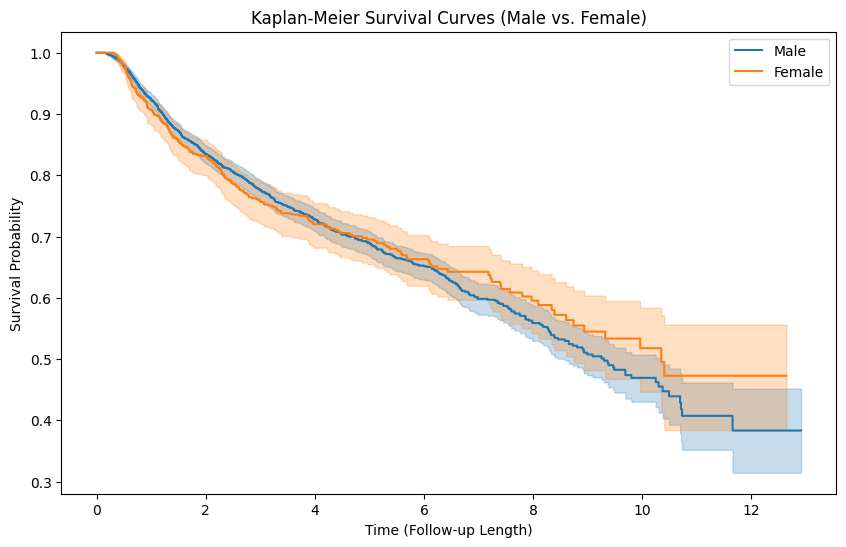

In [4]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import pandas as pd

#Load dataset 
file_path = "/Users/reethighauruthiran/Downloads/RADCURE_Clinical_v04_20241219.xlsx"
data = pd.read_excel(file_path, engine="openpyxl")
print(data.head())

# Convert 'Status' to binary (1 = Dead, 0 = Alive)
data["Event"] = data["Status"].apply(lambda x: 1 if x == "Dead" else 0)

# Define the two groups (Male vs. Female)
group_male = data[data["Sex"] == "Male"]
group_female = data[data["Sex"] == "Female"]

kmf = KaplanMeierFitter()

# Plot survival curve for males 
plt.figure(figsize=(10, 6))
kmf.fit(group_male["Length FU"], event_observed=group_male["Event"], label="Male")
kmf.plot_survival_function()

# Plot survival curve for females
kmf.fit(group_female["Length FU"], event_observed=group_female["Event"], label="Female")
kmf.plot_survival_function()

# Customize plot
plt.title("Kaplan-Meier Survival Curves (Male vs. Female)")
plt.xlabel("Time (Follow-up Length)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()


Cox Regression Analysis

/var/folders/s1/61b5vb6n7_n0wff6fjv_v7gr0000gn/T/ipykernel_16764/3209348356.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cox_data.rename(columns={"Length FU": "week"}, inplace=True)
/var/folders/s1/61b5vb6n7_n0wff6fjv_v7gr0000gn/T/ipykernel_16764/3209348356.py:69: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cox_data["Age"].fillna(cox

<lifelines.CoxPHFitter: fitted with 3346 total observations, 2288 right-censored observations>
             duration col = 'week'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 3346
number of events observed = 1058
   partial log-likelihood = -7728.64
         time fit was run = 2025-03-13 14:53:45 UTC

---
             coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                    
Sex          0.03      1.03      0.08           -0.12            0.18                0.89                1.20
Age          0.04      1.04      0.00            0.03            0.04                1.03                1.04
Chemo       -0.73      0.48      0.08           -0.88           -0.57                0.41                0.57
Stage_I     -0.41      0.67      0.26           -0.92            0.11                0.40                1.11
Stage_IB   -16.37      0.00  21927.23       -42992.94        42960.21                0.00                 inf
Stage_II    -0.13      0.87      0.25           -0.63            0.36                0.53                1.44
Stage_IIA  -11.45      0.00    587.92        -1163.76         1140.86                0.00                 inf
Stage_IIB    1.94      6.94      1.03           -0.08            3.96                0.92               52.20
Stage_III    0.24      1.27      0.25           -0.25            0.72                0.78                2.06
Stage_IIIA   2.58     13.15      0.75            1.11            4.04                3.03               57.06
Stage_IIIC   2.51     12.30      0.75            1.05            3.97                2.84               53.16
Stage_IV     0.96      2.60      0.45            0.08            1.83                1.08                6.25
Stage_IVA    0.55      1.73      0.24            0.07            1.02                1.07                2.77
Stage_IVB    1.34      3.82      0.25            0.85            1.83                2.33                6.24
Stage_IVC  -12.94      0.00   1475.37        -2904.61         2878.73                0.00                 inf
Stage_X      1.66      5.24      0.55            0.57            2.74                1.77               15.52

            cmp to     z      p  -log2(p)
covariate                                
Sex           0.00  0.40   0.69      0.54
Age           0.00 11.39 <0.005     97.41
Chemo         0.00 -9.17 <0.005     64.23
Stage_I       0.00 -1.55   0.12      3.06
Stage_IB      0.00 -0.00   1.00      0.00
Stage_II      0.00 -0.53   0.60      0.74
Stage_IIA     0.00 -0.02   0.98      0.02
Stage_IIB     0.00  1.88   0.06      4.06
Stage_III     0.00  0.96   0.34      1.58
Stage_IIIA    0.00  3.44 <0.005     10.76
Stage_IIIC    0.00  3.36 <0.005     10.32
Stage_IV      0.00  2.13   0.03      4.93
Stage_IVA     0.00  2.26   0.02      5.38
Stage_IVB     0.00  5.33 <0.005     23.32
Stage_IVC     0.00 -0.01   0.99      0.01
Stage_X       0.00  2.99 <0.005      8.48
---
Concordance = 0.70
Partial AIC = 15489.29
log-likelihood ratio test = 485.09 on 16 df
-log2(p) of ll-ratio test = 306.72

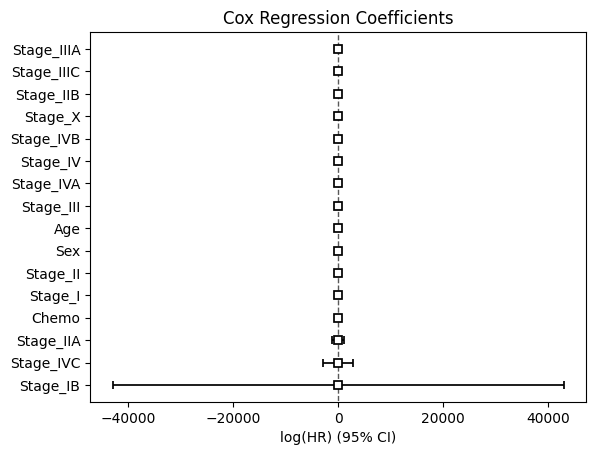

In [18]:
import numpy as np
import pandas as pd
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# Load dataset
file_path = "/Users/reethighauruthiran/Downloads/RADCURE_Clinical_v04_20241219.xlsx"
data = pd.read_excel(file_path, engine="openpyxl")

# Convert 'Status' column to binary (1 = Dead, 0 = Alive)
data["Event"] = data["Status"].apply(lambda x: 1 if x == "Dead" else 0)

# Convert categorical variables into numerical format
data["Sex"] = data["Sex"].map({"Male": 1, "Female": 0}) 

# One-hot encode 'Stage' 
data = pd.get_dummies(data, columns=["Stage"], drop_first=True)

# One-hot encode 'Chemo' column
data["Chemo"] = data["Chemo"].map({"Yes": 1, "None": 0})

# Select variables for Cox regression
cox_data = data[["Length FU", "Event", "Sex", "Age", "Chemo"] + [col for col in data.columns if "Stage_" in col]]

# Rename survival column
cox_data.rename(columns={"Length FU": "week"}, inplace=True)

# Handle missing values
cox_data["Age"].fillna(cox_data["Age"].median(), inplace=True)  
cox_data.fillna(0, inplace=True)  # Fill remaining NaNs with 0

# Fit the Cox regression model
cph = CoxPHFitter()
cph.fit(cox_data, duration_col="week", event_col="Event")

# Print the summary of the model
cph.print_summary()

# Plot the coefficients
cph.plot()
plt.title('Cox Regression Coefficients')
plt.show()


Random Survival Forest
Compare the model’s concordance index with cox regression.

In [39]:



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "/Users/reethighauruthiran/Downloads/RADCURE_Clinical_v04_20241219.xlsx"
data = pd.read_excel(file_path, engine="openpyxl")

# Convert 'Status' column to binary (1 = Dead, 0 = Alive)
data["Event"] = data["Status"].apply(lambda x: 1 if x == "Dead" else 0)

# Convert categorical variables into numerical format
data["Sex"] = data["Sex"].map({"Male": 1, "Female": 0})
data["Chemo"] = data["Chemo"].map({"Yes": 1, "None": 0})

# One-hot encode 'Stage'
data = pd.get_dummies(data, columns=["Stage"], drop_first=True)

# Select variables for the model
features = ["Length FU", "Sex", "Age", "Chemo"] + [col for col in data.columns if "Stage_" in col]
cox_data = data[["Length FU", "Event"] + features].copy()

# Rename 'Length FU' to 'week' BEFORE using it
cox_data.rename(columns={"Length FU": "week"}, inplace=True)

# Event - boolean and week - float
cox_data["Event"] = cox_data["Event"].astype(bool)
cox_data["week"] = pd.to_numeric(cox_data["week"], errors="coerce")

# Drop any remaining NaN values (if any)
cox_data.dropna(inplace=True)

# Convert data into structured format for scikit-survival
structured_data = np.array([(row["Event"], row["week"]) for _, row in cox_data.iterrows()],
                           dtype=[('Event', '?'), ('week', '<f8')])

X = cox_data.drop(columns=["week", "Event"])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, structured_data, test_size=0.2, random_state=42)

# Train Random Survival Forest model
rsf = RandomSurvivalForest(n_estimators=100, min_samples_split=10, min_samples_leaf=5, random_state=42)
rsf.fit(X_train, y_train)

# Compute C-index for RSF
c_index_rsf = concordance_index_censored(y_test["Event"], y_test["week"], rsf.predict(X_test))[0]

# Train Cox Regression for comparison
cph = CoxPHFitter()
cox_train = cox_data.copy()
cph.fit(cox_train, duration_col="week", event_col="Event")

# Compute C-index for Cox model
c_index_cox = cph.concordance_index_

# Variable Importance from RSF
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rsf.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Random Survival Forest - Variable Importance")
plt.show()

# Print results
print(f"  - Random Survival Forest: {c_index_rsf:.4f}")
print(f"  - Cox Regression: {c_index_cox:.4f}")


KeyError: 'Event'